# Feature engineering

## Feature engineeringの目的

- モデルの性能向上

## Feature engineeringのポイント
* データから新しい特徴量を作成するだけでなくnormalizationやtransformationsも特徴量エンジニアリングの領域に含まれる
* タスクのドメインやデータ、ビジネスについて知識を持っているほど成果が出やすい

## Feature engineeringの種類と特徴

### categorical variables

* 異なるcategorical variablesを組み合わせる
* categorical variablesをカウントに変換する
* target encodingを使用する
* embeddingsを使用する
* label-encoding
* one-hot-encoding

### date and time data

### numerical variables

### numerical variables and categorical variables

## date and time dataのFeature engineering

### フューチャーエンジニアリング例

- Year
- Week of year
- Month
- Day of week
- Weekend
- Hour
- And many more.

#### many more
- quarter # 四半期
- is_leap_year # うるう年判定

pandasでできる

### 特徴量の列を個別に追加

* <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html" title="pandas.DatetimeIndex.dayofweek — pandas 1.1.4 documentation" target="_blank">pandas.DatetimeIndex.dayofweek — pandas 1.1.4 documentation</a>
* <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.weekday.html" title="pandas.DatetimeIndex.weekday — pandas 1.1.4 documentation" target="_blank">pandas.DatetimeIndex.weekday — pandas 1.1.4 documentation</a>
* <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.is_leap_year.html" title="pandas.DatetimeIndex.is_leap_year — pandas 1.1.4 documentation" target="_blank">pandas.DatetimeIndex.is_leap_year — pandas 1.1.4 documentation</a>

In [1]:
import pandas as pd

# create a series of datetime with a frequency of 10 hours 
df = pd.DataFrame(pd.date_range('2020-11-28', '2020-12-02', freq='10H', name='datetime_column'))
df

,datetime_column
0,2020-11-28 00:00:00
1,2020-11-28 10:00:00
2,2020-11-28 20:00:00
3,2020-11-29 06:00:00
4,2020-11-29 16:00:00
5,2020-11-30 02:00:00
6,2020-11-30 12:00:00
7,2020-11-30 22:00:00
8,2020-12-01 08:00:00
9,2020-12-01 18:00:00


In [2]:
df.loc[:, 'year'] = df['datetime_column'].dt.year
df.loc[:, 'month'] = df['datetime_column'].dt.month
df.loc[:, 'dayofweek'] = df['datetime_column'].dt.dayofweek # Monday=0, Sunday=6
df.loc[:, 'weekend'] = (df['datetime_column'].dt.weekday >=5).astype(int)
# ↓：こちらでも特に問題だと思う
# df.loc[:, 'weekend_t'] = (df['datetime_column'].dt.dayofweek >=5).astype(int) 
df.loc[:, 'hour'] = df['datetime_column'].dt.hour
df

,datetime_column,year,month,dayofweek,weekend,hour
0,2020-11-28 00:00:00,2020,11,5,1,0
1,2020-11-28 10:00:00,2020,11,5,1,10
2,2020-11-28 20:00:00,2020,11,5,1,20
3,2020-11-29 06:00:00,2020,11,6,1,6
4,2020-11-29 16:00:00,2020,11,6,1,16
5,2020-11-30 02:00:00,2020,11,0,0,2
6,2020-11-30 12:00:00,2020,11,0,0,12
7,2020-11-30 22:00:00,2020,11,0,0,22
8,2020-12-01 08:00:00,2020,12,1,0,8
9,2020-12-01 18:00:00,2020,12,1,0,18


#### Series.dt()を使って日付を変換する場合の注意事項
- 日付データ が文字列の場合は事前にto_datetimeメソッドを使ってdatetime型に変換してく必要があります。
```
data['date'] = pd.to_datetime(data['date'])
```
* 文字列のフォーマットが合っていない場合はapply関数とstrptime関数などを利用する。

dayofweek or weekday ?

In [3]:
df['datetime_column'].dt.dayofweek

0    5
1    5
2    5
3    6
4    6
5    0
6    0
7    0
8    1
9    1
Name: datetime_column, dtype: int64

In [4]:
df['datetime_column'].dt.weekday

0    5
1    5
2    5
3    6
4    6
5    0
6    0
7    0
8    1
9    1
Name: datetime_column, dtype: int64

### 特徴量の辞書を生成

In [5]:
# create a series of datetime with a frequency of 10 hours 
s = pd.date_range('2020-11-28', '2020-12-02', freq='10H').to_series()

# create some features based on datetime 
features = { 
    "dayofweek": s.dt.dayofweek.values, 
    "dayofyear": s.dt.dayofyear.values, 
    "hour": s.dt.hour.values, 
    "is_leap_year": s.dt.is_leap_year.values,
    "quarter": s.dt.quarter.values, 
    "weekofyear": s.dt.weekofyear.values 
}

features

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


{'dayofweek': array([5, 5, 5, 6, 6, 0, 0, 0, 1, 1]),
 'dayofyear': array([333, 333, 333, 334, 334, 335, 335, 335, 336, 336]),
 'hour': array([ 0, 10, 20,  6, 16,  2, 12, 22,  8, 18]),
 'is_leap_year': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 'quarter': array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 'weekofyear': array([48, 48, 48, 48, 48, 49, 49, 49, 49, 49])}

### 特徴量をpandas の aggregate（集計）を利用した関数で生成

#### カテゴリカル変数と日付変数を持つデータフレームから年、月、四半期などの特徴を追加

意図的に顧客IDの重複と1つのカテゴリカル変数を追加しておく

In [6]:
date = ['2016-09-01','2017-04-01','2017-08-01','2017-12-01','2017-09-01']
cust_id = [146361,180838,180838,159772,80014]
cat1 = [2,4,3,5,3]
cat2 = [2,1,3,1,2]
cat3 = [0,0,1,1,1]
num1 = [-0.518679,0.415853,-2.061687,-0.276558,-1.456827]
catv = ['c1','c2','c3','c4','c5']
df = pd.DataFrame({
    'date': pd.to_datetime(date, format='%Y-%m-%d'),
    'customer_id': cust_id,
    'cat1': cat1,
    'cat2': cat2,
    'cat3': cat3,
    'num1': num1,
    'catv': catv
})
df

,date,customer_id,cat1,cat2,cat3,num1,catv
0,2016-09-01,146361,2,2,0,-0.518679,c1
1,2017-04-01,180838,4,1,0,0.415853,c2
2,2017-08-01,180838,3,3,1,-2.061687,c3
3,2017-12-01,159772,5,1,1,-0.276558,c4
4,2017-09-01,80014,3,2,1,-1.456827,c5


* <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html?highlight=aggregate#pandas.DataFrame.aggregate" title="pandas.DataFrame.aggregate — pandas 1.1.4 documentation" target="_blank">pandas.DataFrame.aggregate — pandas 1.1.4 documentation</a>
* <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html?highlight=aggregate#pandas.core.groupby.DataFrameGroupBy.aggregate" title="pandas.core.groupby.DataFrameGroupBy.aggregate — pandas 1.1.4 documentation" target="_blank">pandas.core.groupby.DataFrameGroupBy.aggregate — pandas 1.1.4 documentation</a>

In [7]:
def generate_features(df): 
    # create a bunch of features using the date column 
    df.loc[:, 'year'] = df['date'].dt.year 
    df.loc[:, 'weekofyear'] = df['date'].dt.weekofyear 
    df.loc[:, 'month'] = df['date'].dt.month 
    df.loc[:, 'dayofweek'] = df['date'].dt.dayofweek 
    df.loc[:, 'weekend'] = (df['date'].dt.weekday >=5).astype(int) 
     
    # create an aggregate dictionary 
    aggs = {} 
    # for aggregation by month, we calculate the 
    # number of unique month values and also the mean 
    aggs['month'] = ['nunique', 'mean'] 
    aggs['weekofyear'] = ['nunique', 'mean'] 
    # we aggregate by num1 and calculate sum, max, min  
    # and mean values of this column 
    aggs['num1'] = ['sum','max','min','mean'] 
    # for customer_id, we calculate the total count 
    aggs['customer_id'] = ['size'] 
    # again for customer_id, we calculate the total unique 
    aggs['customer_id'] = ['nunique']

    # カテゴリカル変数も扱うことができる
    aggs['catv'] = ['nunique']
     
    # we group by customer_id and calculate the aggregates 
    agg_df = df.groupby('customer_id').agg(aggs) 
    agg_df = agg_df.reset_index() 
    return agg_df 

In [8]:
generate_features(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


customer_id   month      weekofyear  ...      num1           customer_id    catv
              nunique mean    nunique  ...       min      mean     nunique nunique
0       80014       1    9          1  ... -1.456827 -1.456827           1       1
1      146361       1    9          1  ... -0.518679 -0.518679           1       1
2      159772       1   12          1  ... -0.276558 -0.276558           1       1
3      180838       2    6          2  ... -2.061687 -0.822917           1       2

[4 rows x 11 columns]

* カテゴリカル変数もそのまま扱えている（catv）

## numerical variablesのFeature engineering

### 統計的によるFeature engineering

#### 利用事例
-  時系列データである期間における集計
- カテゴリカル変数値でグルーピングした値の集計
---

#### 集計例
- Mean
- Max
- Min
- STD
- Var
- Unique
- Skew # 歪度(Skewness)
- Kurtosis # 尖度(Kurtosis)
- Kstat # k-statistic ？ # κ統計量 kappa statistic
- Percentile
- Quantile
- Peak to peak # (maximum - minimum)
- And many more

---

#### numpyで個別に集計
* <a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html" title="numpy.mean — NumPy v1.19 Manual" target="_blank">numpy.mean — NumPy v1.19 Manual</a>
* <a href="https://numpy.org/doc/stable/reference/generated/numpy.std.html" title="numpy.std — NumPy v1.19 Manual" target="_blank">numpy.std — NumPy v1.19 Manual</a>
* <a href="https://numpy.org/doc/stable/reference/generated/numpy.var.html" title="numpy.var — NumPy v1.19 Manual" target="_blank">numpy.var — NumPy v1.19 Manual</a>
* <a href="https://numpy.org/doc/stable/reference/generated/numpy.ptp.html" title="numpy.ptp — NumPy v1.19 Manual" target="_blank">numpy.ptp — NumPy v1.19 Manual</a>
* <a href="https://numpy.org/doc/stable/reference/generated/numpy.percentile.html" title="numpy.percentile — NumPy v1.19 Manual" target="_blank">numpy.percentile — NumPy v1.19 Manual</a>

In [9]:
import numpy as np

x = np.arange(0,101, dtype=int)
 
feature_dict = {} 
 
# calculate mean 
feature_dict['mean'] = np.mean(x) 
 
# calculate max 
feature_dict['max'] = np.max(x) 
 
# calculate min 
feature_dict['min'] = np.min(x) 
 
# calculate standard deviation 
feature_dict['std'] = np.std(x) 
 
# calculate variance 
feature_dict['var'] = np.var(x) 
 
# peak-to-peak {Range of values (maximum - minimum) along an axis.}
feature_dict['ptp'] = np.ptp(x) 
 
# percentile features {Compute the q-th percentile of the data along the specified axis.}
feature_dict['percentile_10'] = np.percentile(x, 10) 
feature_dict['percentile_60'] = np.percentile(x, 60) 
feature_dict['percentile_90'] = np.percentile(x, 90) 
 
# quantile features 
feature_dict['quantile_5'] = np.percentile(x, 5) 
feature_dict['quantile_95'] = np.percentile(x, 95) 
feature_dict['quantile_99'] = np.percentile(x, 99) 

#### scipyで個別に集計

* <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html" title="scipy.stats.skew — SciPy v1.5.4 Reference Guide" target="_blank">scipy.stats.skew — SciPy v1.5.4 Reference Guide</a>
* <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html?highlight=kurtosis#scipy.stats.kurtosis" title="scipy.stats.kurtosis — SciPy v1.5.4 Reference Guide" target="_blank">scipy.stats.kurtosis — SciPy v1.5.4 Reference Guide</a>

In [10]:
from scipy.stats import skew, kurtosis

feature_dict['skewness'] = skew(x)
feature_dict['kurtosis'] = kurtosis(x)

* <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstat.html" title="scipy.stats.kstat — SciPy v1.5.4 Reference Guide" target="_blank">scipy.stats.kstat — SciPy v1.5.4 Reference Guide</a>

In [11]:
from scipy import stats

n = 2
feature_dict['kstat'] = stats.kstat(x, n)

In [12]:
feature_dict

{'kstat': 858.5,
 'kurtosis': -1.200235294117647,
 'max': 100,
 'mean': 50.0,
 'min': 0,
 'percentile_10': 10.0,
 'percentile_60': 60.0,
 'percentile_90': 90.0,
 'ptp': 100,
 'quantile_5': 5.0,
 'quantile_95': 95.0,
 'quantile_99': 99.0,
 'skewness': 0.0,
 'std': 29.154759474226502,
 'var': 850.0}

#### tsfresh モジュールの活用

* 時系列データ（値のリスト）の特徴量変換に使える。  
* 数百の特徴と数十の異なる特徴のバリエーションを提供。
* <a href="https://pypi.org/project/tsfresh/" title="tsfresh · PyPI" target="_blank">tsfresh · PyPI</a>

In [13]:
!pip install tsfresh

     |████████████████████████████████| 92kB 3.5MB/s 
     |████████████████████████████████| 665kB 8.8MB/s 
     |████████████████████████████████| 92kB 8.9MB/s 
     |████████████████████████████████| 102kB 10.6MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=745017237e1205d7e231b46daefd6a483f105571d290479e2758b07e69e2c0e6
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=14b855e74e4beb79919572802fadfee26b309ef0e9587d7ed458067495553b11
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built contextvars locket
ERROR: tensorflow-probability 0.11.0 has requirement cloudpickle==1.3, but you'll have cloudpickle 1.6.0 which is incompatible.
  Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Su

In [14]:
from tsfresh.feature_extraction import feature_calculators as fc 

feature_dict1 = {}

# tsfresh based features 
feature_dict1['abs_energy'] = fc.abs_energy(x) 
feature_dict1['count_above_mean'] = fc.count_above_mean(x) 
feature_dict1['count_below_mean'] = fc.count_below_mean(x) 
feature_dict1['mean_abs_change'] = fc.mean_abs_change(x) 
feature_dict1['mean_change'] = fc.mean_change(x) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* abs_energy : 二乗値の合計である時系列の絶対エネルギーを返す
* count_above_mean : xの平均よりも大きいxの値の数を返す
* count_below_mean : xの平均よりも小さいxの値の数を返す
* mean_abs_change : 後続の時系列の値間の絶対差の平均を返す
* mean_change : 後続の時系列の値間の差の平均を返す

コード
* <a href="https://tsfresh.readthedocs.io/en/latest/_modules/tsfresh/feature_extraction/feature_calculators.html" title="tsfresh.feature_extraction.feature_calculators — tsfresh 0.17.1.dev12+gaf4e141 documentation" target="_blank">tsfresh.feature_extraction.feature_calculators — tsfresh 0.17.1.dev12+gaf4e141 documentation</a>

In [15]:
feature_dict1

{'abs_energy': 338350,
 'count_above_mean': 50,
 'count_below_mean': 50,
 'mean_abs_change': 1.0,
 'mean_change': 1.0}

### 多項式によるFeature engineering

* 交互作用利用して複合条件を抽出(40代、男性　等）
* 線形分離できない形状を非線形にすることによって分離


In [16]:
# generate a random dataframe with  
# 2 columns and 100 rows 
df = pd.DataFrame( 
    np.random.rand(100, 2), 
    columns=[f"f_{i}" for i in range(1, 3)] 
) 

In [17]:
df

,f_1,f_2
0,0.214649,0.434822
1,0.813402,0.613749
2,0.562274,0.515808
3,0.316041,0.208042
4,0.899745,0.951623
...,...,...
95,0.602500,0.234150
96,0.342927,0.206101
97,0.428971,0.154589
98,0.525030,0.967091


#### 2次の多項式特徴量生成

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html" title="sklearn.preprocessing.PolynomialFeatures — scikit-learn 0.23.2 documentation" target="_blank">sklearn.preprocessing.PolynomialFeatures — scikit-learn 0.23.2 documentation</a>

degree=2　なので 2次の多項式

$$x_1^2+x_1x_2+x_2^2$$

In [18]:
from sklearn import preprocessing

# initialize polynomial features class object
# for two-degree polynomial features
pf = preprocessing.PolynomialFeatures(
    degree=2,
    interaction_only=False, # Trueで、交互作用項（“ab”）だけ出力
    include_bias=False # Trueで、バイアス項を出力（=すべて1の列）
)

# fit to the features
pf.fit(df)

# create polynomial features
poly_feats = pf.transform(df)

# create a dataframe with all the features
num_feats = poly_feats.shape[1]
df_transformed = pd.DataFrame(
    poly_feats,
    columns=[f"f_{i}" for i in range(1, num_feats + 1)]
)

In [19]:
# poly_feats
poly_feats.shape # (100, 5)
# “a”, “b”, “a^2”, “ab”, “b^2” の 5つ

(100, 5)

In [20]:
df_transformed

,f_1,f_2,f_3,f_4,f_5
0,0.214649,0.434822,0.046074,0.093334,0.189070
1,0.813402,0.613749,0.661623,0.499224,0.376687
2,0.562274,0.515808,0.316152,0.290025,0.266058
3,0.316041,0.208042,0.099882,0.065750,0.043281
4,0.899745,0.951623,0.809541,0.856217,0.905585
...,...,...,...,...,...
95,0.602500,0.234150,0.363006,0.141075,0.054826
96,0.342927,0.206101,0.117599,0.070677,0.042477
97,0.428971,0.154589,0.184016,0.066314,0.023898
98,0.525030,0.967091,0.275657,0.507752,0.935264


#### 3次の多項式特徴量生成

degree=3　なので 3次の多項式
$$x_1^3+x_1^2x_2+x_1x_2^2+x_2^3$$
$$+$$
$$x_1^2+x_1x_2+x_2^2$$

In [21]:
pf = preprocessing.PolynomialFeatures(
    degree=3,
    interaction_only=False,
    include_bias=False
)

pf.fit(df)
poly_feats = pf.transform(df)

num_feats = poly_feats.shape[1]
df_transformed = pd.DataFrame(
    poly_feats,
    columns=[f"f_{i}" for i in range(1, num_feats + 1)]
)

In [22]:
poly_feats.shape # (100, 9)
# 'a', 'b', 'a^2', 'ab', 'b^2' 'a^3', 'aab', 'abb', 'b^3' の 9つ

(100, 9)

In [23]:
df_transformed

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9
0,0.214649,0.434822,0.046074,0.093334,0.189070,0.009890,0.020034,0.040584,0.082212
1,0.813402,0.613749,0.661623,0.499224,0.376687,0.538165,0.406070,0.306398,0.231191
2,0.562274,0.515808,0.316152,0.290025,0.266058,0.177764,0.163074,0.149598,0.137235
3,0.316041,0.208042,0.099882,0.065750,0.043281,0.031567,0.020780,0.013679,0.009004
4,0.899745,0.951623,0.809541,0.856217,0.905585,0.728380,0.770377,0.814796,0.861776
...,...,...,...,...,...,...,...,...,...
95,0.602500,0.234150,0.363006,0.141075,0.054826,0.218711,0.084998,0.033033,0.012838
96,0.342927,0.206101,0.117599,0.070677,0.042477,0.040328,0.024237,0.014567,0.008755
97,0.428971,0.154589,0.184016,0.066314,0.023898,0.078937,0.028447,0.010251,0.003694
98,0.525030,0.967091,0.275657,0.507752,0.935264,0.144728,0.266585,0.491042,0.904486


#### 特徴量の数が増えると多項式特徴量数も増える

In [24]:
# 3 columns and 100 rows 
df = pd.DataFrame( 
    np.random.rand(100, 3), 
    columns=[f"f_{i}" for i in range(1, 4)] 
) 

In [25]:
df

,f_1,f_2,f_3
0,0.638524,0.544039,0.063507
1,0.781498,0.279519,0.106093
2,0.587467,0.511898,0.327700
3,0.122122,0.696002,0.607448
4,0.044448,0.165441,0.902741
...,...,...,...
95,0.515462,0.755174,0.040406
96,0.058161,0.618152,0.982759
97,0.637800,0.748223,0.749206
98,0.377163,0.335250,0.725380


In [26]:
pf = preprocessing.PolynomialFeatures(
    degree=2,
    interaction_only=False,
    include_bias=False
)

pf.fit(df)
poly_feats = pf.transform(df)

num_feats = poly_feats.shape[1]
df_transformed = pd.DataFrame(
    poly_feats,
    columns=[f"f_{i}" for i in range(1, num_feats + 1)]
)

In [27]:
poly_feats.shape
# (100, 5)
# ↓
# (100, 9)
# 'a', 'b', 'c', 'a^2', 'ab', 'ac', 'b^2', 'bc', 'c^2' の 9つ

(100, 9)

#### 次数や特徴数が増えると計算量が爆発的に増えるので注意

In [28]:
pf = preprocessing.PolynomialFeatures(
    degree=3,
    interaction_only=False,
    include_bias=False
)

pf.fit(df)
poly_feats = pf.transform(df)

num_feats = poly_feats.shape[1]
df_transformed = pd.DataFrame(
    poly_feats,
    columns=[f"f_{i}" for i in range(1, num_feats + 1)]
)

In [29]:
poly_feats.shape
# (100, 9)
# ↓
# (100, 19)

(100, 19)

### binning

ビニング処理（ビン分割） : 連続値に任意の閾値を設けビン分割し離散値に変換する
* 数値特徴カテゴリカル変数として扱う
* 年齢層別　等

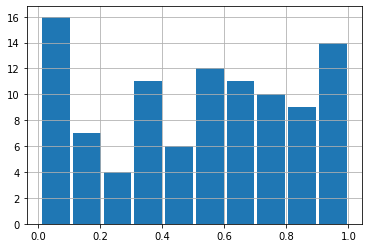

In [30]:
df_transformed['f_1'].hist(bins=10, rwidth=0.9)

In [31]:
df = df_transformed[['f_1', 'f_2']]

#### pandasのcut関数でbinning
* <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html" title="pandas.cut — pandas 1.1.4 documentation" target="_blank">pandas.cut — pandas 1.1.4 documentation</a>

In [32]:
# create bins of the numerical columns
# 10 bins
df["f_bin_10"] = pd.cut(df["f_1"], bins=10, labels=False)
# 100 bins
df["f_bin_100"] = pd.cut(df["f_1"], bins=100, labels=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [33]:
df

,f_1,f_2,f_bin_10,f_bin_100
0,0.638524,0.544039,6,63
1,0.781498,0.279519,7,78
2,0.587467,0.511898,5,58
3,0.122122,0.696002,1,11
4,0.044448,0.165441,0,3
...,...,...,...,...
95,0.515462,0.755174,5,51
96,0.058161,0.618152,0,5
97,0.637800,0.748223,6,63
98,0.377163,0.335250,3,37


### 対数変換

* 極端に値の大きいデータをスケーリング
* 歪度の大きいデータ分布を正規分布に近づけるように補正

In [34]:
df['f_3'] = np.random.randint(0, 10000, 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df

,f_1,f_2,f_bin_10,f_bin_100,f_3
0,0.638524,0.544039,6,63,7026
1,0.781498,0.279519,7,78,4272
2,0.587467,0.511898,5,58,6196
3,0.122122,0.696002,1,11,3250
4,0.044448,0.165441,0,3,1287
...,...,...,...,...,...
95,0.515462,0.755174,5,51,2995
96,0.058161,0.618152,0,5,2069
97,0.637800,0.748223,6,63,3611
98,0.377163,0.335250,3,37,8268


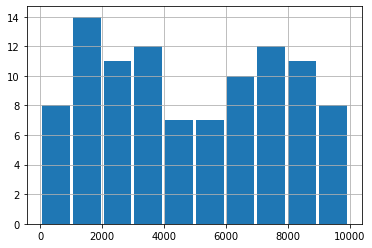

In [36]:
df['f_3'].hist(bins=10, rwidth=0.9)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


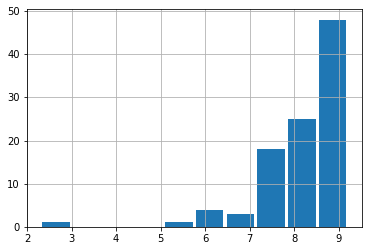

In [37]:
df['f_3h'] = df['f_3'].apply(lambda x:np.log(1+x))
df['f_3h'].hist(bins=10, rwidth=0.9)

In [38]:
df.f_3.var()

8229868.246060606

In [39]:
df.f_3h.apply(lambda x:np.log(1+x)).var()

0.020149154727814225

In [40]:
df

,f_1,f_2,f_bin_10,f_bin_100,f_3,f_3h
0,0.638524,0.544039,6,63,7026,8.857515
1,0.781498,0.279519,7,78,4272,8.360071
2,0.587467,0.511898,5,58,6196,8.731821
3,0.122122,0.696002,1,11,3250,8.086718
4,0.044448,0.165441,0,3,1287,7.160846
...,...,...,...,...,...,...
95,0.515462,0.755174,5,51,2995,8.005033
96,0.058161,0.618152,0,5,2069,7.635304
97,0.637800,0.748223,6,63,3611,8.192017
98,0.377163,0.335250,3,37,8268,9.020269


## 欠損値処理

In [41]:
# create a random numpy array with 10 samples
# and 6 features and values ranging from 1 to 15
X = np.random.randint(1, 15, (10, 6))

# convert the array to float
X = X.astype(float)

# randomly assign 10 elements to NaN (missing)
X.ravel()[np.random.choice(X.size, 10, replace=False)] = np.nan

In [42]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,1.0,2.0,11.0,7.0,NaN,5.0
1,10.0,9.0,4.0,3.0,11.0,8.0
2,NaN,1.0,7.0,NaN,8.0,7.0
3,1.0,NaN,10.0,8.0,14.0,7.0
4,12.0,13.0,10.0,13.0,9.0,7.0
5,13.0,5.0,NaN,4.0,5.0,2.0
6,10.0,6.0,NaN,11.0,NaN,11.0
7,12.0,8.0,11.0,3.0,8.0,13.0
8,10.0,4.0,4.0,11.0,8.0,NaN
9,NaN,7.0,7.0,NaN,8.0,1.0


### 欠損値があるデータを削除

In [43]:
pd.DataFrame(X).dropna(how='any')

,0,1,2,3,4,5
1,10.0,9.0,4.0,3.0,11.0,8.0
4,12.0,13.0,10.0,13.0,9.0,7.0
7,12.0,8.0,11.0,3.0,8.0,13.0


### 特徴量にない値を使って埋める

In [44]:
# 現在持っている値を確認
features = [x for x in pd.DataFrame(X).columns] 
for feat in features: 
    print(np.sort(pd.DataFrame(X)[feat].unique()))

[ 1. 10. 12. 13. nan]
[ 1.  2.  4.  5.  6.  7.  8.  9. 13. nan]
[ 4.  7. 10. 11. nan]
[ 3.  4.  7.  8. 11. 13. nan]
[ 5.  8.  9. 11. 14. nan]
[ 1.  2.  5.  7.  8. 11. 13. nan]


In [45]:
pd.DataFrame(X).fillna(0)

,0,1,2,3,4,5
0,1.0,2.0,11.0,7.0,0.0,5.0
1,10.0,9.0,4.0,3.0,11.0,8.0
2,0.0,1.0,7.0,0.0,8.0,7.0
3,1.0,0.0,10.0,8.0,14.0,7.0
4,12.0,13.0,10.0,13.0,9.0,7.0
5,13.0,5.0,0.0,4.0,5.0,2.0
6,10.0,6.0,0.0,11.0,0.0,11.0
7,12.0,8.0,11.0,3.0,8.0,13.0
8,10.0,4.0,4.0,11.0,8.0,0.0
9,0.0,7.0,7.0,0.0,8.0,1.0


### 平均値で埋める

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html" title="sklearn.impute.SimpleImputer — scikit-learn 0.23.2 documentation" target="_blank">sklearn.impute.SimpleImputer — scikit-learn 0.23.2 documentation</a>
* <a href="https://www.haya-programming.com/entry/2019/10/13/025136" title="【python】sklearnのSimpleImputerで欠損値補完をしてみる - 静かなる名辞" target="_blank">【python】sklearnのSimpleImputerで欠損値補完をしてみる - 静かなる名辞</a>
* 平均値のほかに中央値や最頻値、定数なども利用できる

In [46]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
imp.fit(X)
X_mean = imp.transform(X)

In [47]:
pd.DataFrame(X_mean)

,0,1,2,3,4,5
0,1.000,2.000000,11.0,7.0,8.875,5.000000
1,10.000,9.000000,4.0,3.0,11.000,8.000000
2,8.625,1.000000,7.0,7.5,8.000,7.000000
3,1.000,6.111111,10.0,8.0,14.000,7.000000
4,12.000,13.000000,10.0,13.0,9.000,7.000000
5,13.000,5.000000,8.0,4.0,5.000,2.000000
6,10.000,6.000000,8.0,11.0,8.875,11.000000
7,12.000,8.000000,11.0,3.0,8.000,13.000000
8,10.000,4.000000,4.0,11.0,8.000,6.777778
9,8.625,7.000000,7.0,7.5,8.000,1.000000


In [48]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5
count,8.000000,9.000000,8.0000,8.000000,8.000000,9.000000
mean,8.625000,6.111111,8.0000,7.500000,8.875000,6.777778
std,4.838462,3.689324,2.9277,3.927922,2.642374,3.833333
min,1.000000,1.000000,4.0000,3.000000,5.000000,1.000000
25%,7.750000,4.000000,6.2500,3.750000,8.000000,5.000000
50%,10.000000,6.000000,8.5000,7.500000,8.000000,7.000000
75%,12.000000,8.000000,10.2500,11.000000,9.500000,8.000000
max,13.000000,13.000000,11.0000,13.000000,14.000000,13.000000


### 中央値で埋める

In [49]:
imp = SimpleImputer(strategy='median')
imp.fit(X)
X_median = imp.transform(X)

In [50]:
pd.DataFrame(X_median)

,0,1,2,3,4,5
0,1.0,2.0,11.0,7.0,8.0,5.0
1,10.0,9.0,4.0,3.0,11.0,8.0
2,10.0,1.0,7.0,7.5,8.0,7.0
3,1.0,6.0,10.0,8.0,14.0,7.0
4,12.0,13.0,10.0,13.0,9.0,7.0
5,13.0,5.0,8.5,4.0,5.0,2.0
6,10.0,6.0,8.5,11.0,8.0,11.0
7,12.0,8.0,11.0,3.0,8.0,13.0
8,10.0,4.0,4.0,11.0,8.0,7.0
9,10.0,7.0,7.0,7.5,8.0,1.0


In [51]:
pd.DataFrame(X).median()

0    10.0
1     6.0
2     8.5
3     7.5
4     8.0
5     7.0
dtype: float64

### k近傍法(k-nearest neighbour algorithm, k-NN)で埋める

KNNImputerは、ユークリッド距離行列を使用して最近傍を見つけ平均をとった値で欠測値を補完する

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html" title="sklearn.impute.KNNImputer — scikit-learn 0.23.2 documentation" target="_blank">sklearn.impute.KNNImputer — scikit-learn 0.23.2 documentation</a>

In [52]:
from sklearn import impute

# use 3 nearest neighbours to fill na values
knn_imputer = impute.KNNImputer(n_neighbors=2)
X_knn2 = knn_imputer.fit_transform(X)

In [53]:
pd.DataFrame(X_knn2)

,0,1,2,3,4,5
0,1.0,2.0,11.0,7.0,11.0,5.0
1,10.0,9.0,4.0,3.0,11.0,8.0
2,5.5,1.0,7.0,9.0,8.0,7.0
3,1.0,1.5,10.0,8.0,14.0,7.0
4,12.0,13.0,10.0,13.0,9.0,7.0
5,13.0,5.0,7.0,4.0,5.0,2.0
6,10.0,6.0,7.0,11.0,8.5,11.0
7,12.0,8.0,11.0,3.0,8.0,13.0
8,10.0,4.0,4.0,11.0,8.0,9.0
9,11.5,7.0,7.0,7.5,8.0,1.0


In [54]:
# use 3 nearest neighbours to fill na values
knn_imputer = impute.KNNImputer(n_neighbors=1)
X_knn1 = knn_imputer.fit_transform(X)

In [55]:
pd.DataFrame(X_knn1)

,0,1,2,3,4,5
0,1.0,2.0,11.0,7.0,14.0,5.0
1,10.0,9.0,4.0,3.0,11.0,8.0
2,10.0,1.0,7.0,11.0,8.0,7.0
3,1.0,2.0,10.0,8.0,14.0,7.0
4,12.0,13.0,10.0,13.0,9.0,7.0
5,13.0,5.0,7.0,4.0,5.0,2.0
6,10.0,6.0,4.0,11.0,8.0,11.0
7,12.0,8.0,11.0,3.0,8.0,13.0
8,10.0,4.0,4.0,11.0,8.0,11.0
9,13.0,7.0,7.0,4.0,8.0,1.0


In [56]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,1.0,2.0,11.0,7.0,NaN,5.0
1,10.0,9.0,4.0,3.0,11.0,8.0
2,NaN,1.0,7.0,NaN,8.0,7.0
3,1.0,NaN,10.0,8.0,14.0,7.0
4,12.0,13.0,10.0,13.0,9.0,7.0
5,13.0,5.0,NaN,4.0,5.0,2.0
6,10.0,6.0,NaN,11.0,NaN,11.0
7,12.0,8.0,11.0,3.0,8.0,13.0
8,10.0,4.0,4.0,11.0,8.0,NaN
9,NaN,7.0,7.0,NaN,8.0,1.0


* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html" title="sklearn.metrics.pairwise.distance_metrics — scikit-learn 0.23.2 documentation" target="_blank">sklearn.metrics.pairwise.distance_metrics — scikit-learn 0.23.2 documentation</a>
* 欠測値が存在する場合のユークリッド距離を計算 : <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html" title="sklearn.metrics.pairwise.nan_euclidean_distances — scikit-learn 0.23.2 documentation" target="_blank">sklearn.metrics.pairwise.nan_euclidean_distances — scikit-learn 0.23.2 documentation</a>

In [57]:
from sklearn.metrics.pairwise import nan_euclidean_distances

corr = df.corr()

pd.DataFrame(nan_euclidean_distances(X, X)).style.background_gradient(cmap='coolwarm').set_precision(4)
# 距離が最も近いのは...

,0,1,2,3,4,5,6,7,8,9
0,0.0000,15.6461,6.4807,3.0000,18.4282,16.0156,14.9499,16.8642,15.0000,10.6771
1,15.6461,0.0000,11.1580,13.5056,12.6886,10.8444,11.0905,9.3808,10.8444,10.3199
2,6.4807,11.1580,0.0000,9.4868,15.1987,10.0000,11.0905,12.3085,6.0000,10.3923
3,3.0000,13.5056,9.4868,0.0000,14.3248,19.9750,14.5602,16.2111,15.5885,12.7279
4,18.4282,12.6886,15.1987,14.3248,0.0000,14.9800,10.4642,12.7671,12.2963,11.0905
5,16.0156,10.8444,10.0000,19.9750,14.9800,0.0000,14.4914,13.0077,10.0995,5.2915
6,14.9499,11.0905,11.0905,14.5602,10.4642,14.4914,0.0000,10.6771,2.8284,17.4069
7,16.8642,9.3808,12.3085,16.2111,12.7671,13.0077,10.6771,0.0000,12.6333,15.5403
8,15.0000,10.8444,6.0000,15.5885,12.2963,10.0995,2.8284,12.6333,0.0000,6.0000
9,10.6771,10.3199,10.3923,12.7279,11.0905,5.2915,17.4069,15.5403,6.0000,0.0000


### any more

* 他の列に基づいて補完する列の欠損値を予測する回帰モデルを訓練する
* よりロバストな欠損値処理ができる

## まとめ

* タスクのドメインやデータ、ビジネスについて知識を持っているほど成果が出やすい
* この手の機能は一般化できないので、毎回データを見て、何がフィットするかを見て、それに応じた機能を作るように心がける